In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_curve,auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import Xception,DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
from tensorflow.keras.optimizers import Adam
from PIL import Image
import os
import pandas as pd
import shutil

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
top_50_path = "/content/drive/My Drive/facescrub_top_50_classes"




train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,   # تحريك الصورة أفقياً
    height_shift_range=0.2,  # تحريك الصورة عمودياً
    shear_range=0.2,         # تشويه القص
    brightness_range=[0.8, 1.2],  # تغيير سطوع الصورة
    horizontal_flip=True,
    validation_split=0.2
)
val_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

In [ ]:
train_generator_xcption = train_datagen.flow_from_directory(
    top_50_path,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator_xcption = train_datagen.flow_from_directory(
    top_50_path,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4615 images belonging to 50 classes.
Found 1129 images belonging to 50 classes.


In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(128,128, 3))

for layer in base_model.layers[:-20]:  # قم بتجميد الطبقات الأولى فقط
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(train_generator_xcption.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# file_path = "/content/drive/My Drive/xception_checkpoint.keras"

# # إنشاء الملف بامتداد .keras
# with open(file_path, "w") as file:
#     file.write("")  # ملف فارغ

# print(f"File created at: {file_path}")
# from tensorflow.keras.callbacks import ModelCheckpoint

# # تعريف مسار الحفظ
# checkpoint_path = "/content/drive/My Drive/xception_checkpoint.keras"

# # إنشاء كائن ModelCheckpoint
# checkpoint = ModelCheckpoint(
#     filepath=checkpoint_path,  # مسار الحفظ
#     monitor='val_loss',       # معيار المراقبة
#     save_best_only=True,      # حفظ النموذج فقط إذا كان أفضل من السابق
#     verbose=1                 # عرض رسائل عند الحفظ
# )

In [ ]:
history = model.fit(
    train_generator_xcption,
    steps_per_epoch=train_generator_xcption.samples // train_generator_xcption.batch_size,
    epochs=10,
    # callbacks=[checkpoint]
    validation_data=val_generator_xcption,  # إضافة بيانات التحقق
    validation_steps=val_generator_xcption.samples // val_generator_xcption.batch_size  # تحديد خطوات التحقق
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 1485s 19s/step - accuracy: 0.1193 - loss: 3.5802 - val_accuracy: 0.1967 - val_loss: 3.9798
Epoch 2/10
 1/72 ━━━━━━━━━━━━━━━━━━━━ 9:55 8s/step - accuracy: 0.4844 - loss: 1.9107

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.4844 - loss: 1.9107 - val_accuracy: 0.1951 - val_loss: 4.5570
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 721s 10s/step - accuracy: 0.5206 - loss: 1.6595 - val_accuracy: 0.4835 - val_loss: 2.1220
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.6719 - loss: 1.3540 - val_accuracy: 0.6098 - val_loss: 1.4257
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 721s 10s/step - accuracy: 0.7166 - loss: 0.9593 - val_accuracy: 0.5892 - val_loss: 1.7027
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.6719 - loss: 0.9612 - val_accuracy: 0.6585 - val_loss: 1.1331
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 732s 10s/step - accuracy: 0.7917 - loss: 0.7031 - val_accuracy: 0.5882 - val_loss: 1.6526
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7656 - loss: 0.9198 - val_accuracy: 0.4878 - val_loss: 1.8654
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 720s 10s/step - accuracy: 0.8038 - loss: 0.6393 - val_accuracy: 0.7004 - val_

In [ ]:
loss, accuracy = model.evaluate(val_generator_xcption)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 105s 6s/step - accuracy: 0.7022 - loss: 1.0956
Validation Accuracy: 70.77%


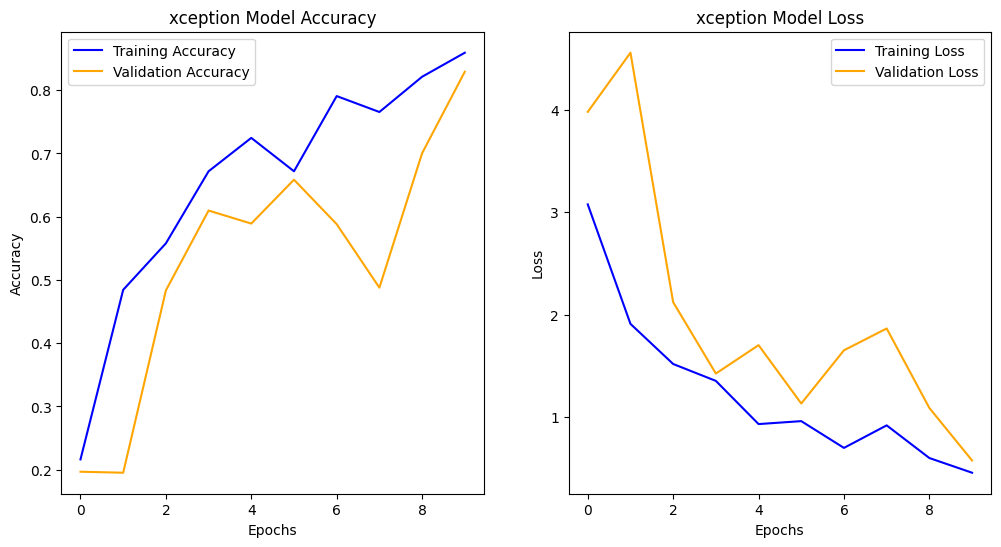

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('xception Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('xception Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
all_imgs = []
all_labels = []

for i in range(len(val_generator_xcption)):
    imgs, labels = next(val_generator_xcption)
    all_imgs.append(imgs)
    all_labels.append(labels)

# تحويل القوائم إلى مصفوفات
all_imgs = np.vstack(all_imgs)
all_labels = np.vstack(all_labels)

# التنبؤ بكل الصور دفعة واحدة
y_pred = model.predict(all_imgs)

# تحويل التنبؤات إلى الفئات
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(all_labels, axis=1)

# عرض النتائج
print("Predicted Classes:", y_pred_classes[:10])
print("True Classes:", y_true_classes[:10])

36/36 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step
Predicted Classes: [ 8 34 41 25 29 25 45 34  8  2]
True Classes: [10 34 41 25 33 25 27 34  8  6]


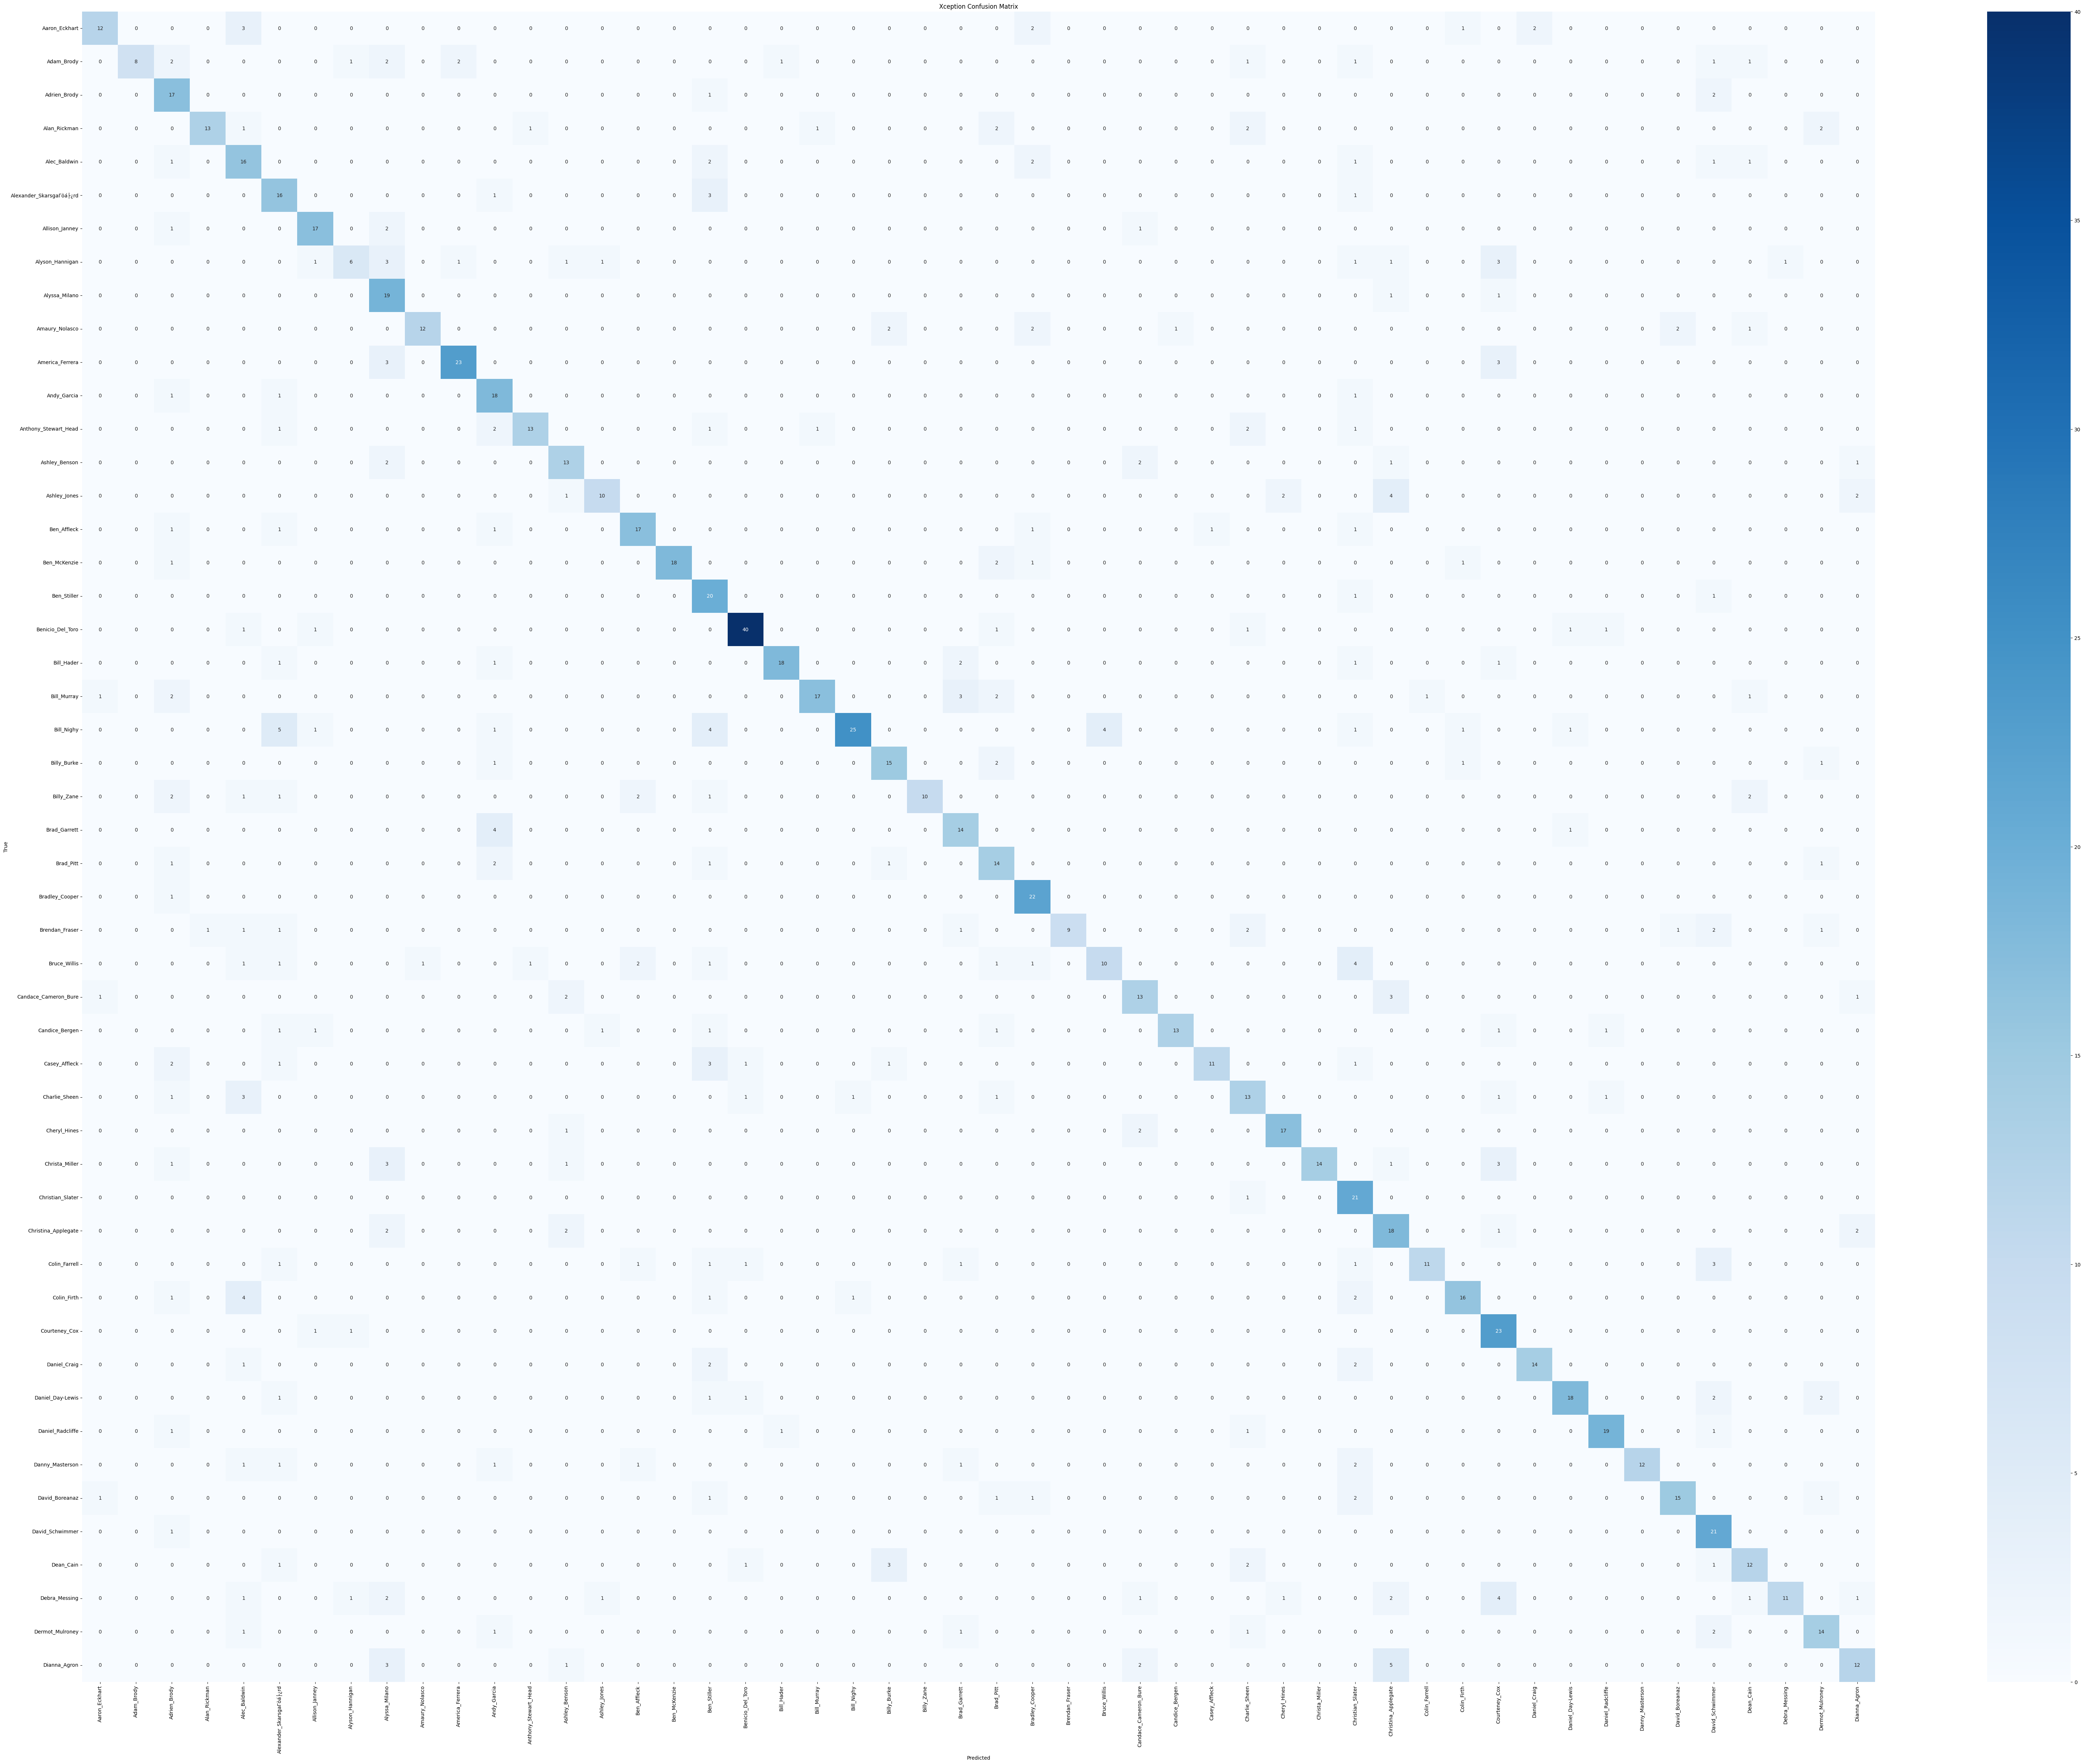

In [ ]:
import seaborn as sns
xception_cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(80, 60))
sns.heatmap(xception_cm, annot=True, fmt="d", cmap="Blues", xticklabels=val_generator_xcption.class_indices.keys(), yticklabels=val_generator_xcption.class_indices.keys())
plt.title("Xception Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.76
Recall: 0.69
F1-Score: 0.69


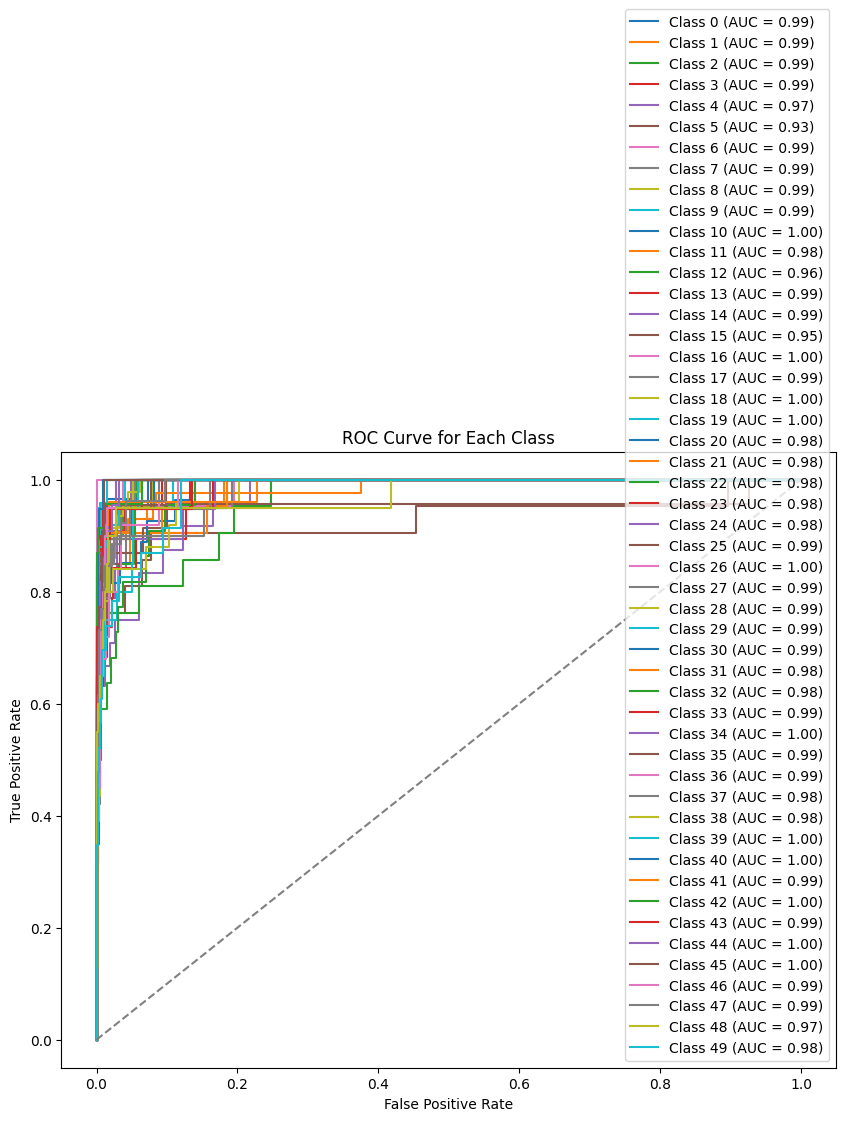

In [ ]:
from sklearn.preprocessing import label_binarize

n_classes = all_labels.shape[1]  # number of classes
y_true_bin = label_binarize(y_true_classes, classes=np.arange(n_classes))
y_pred_bin = y_pred  # The raw prediction probabilities

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)

    # Plotting each class ROC curve
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot random classifier (diagonal)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customizing the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')

# Show the plot
plt.show()

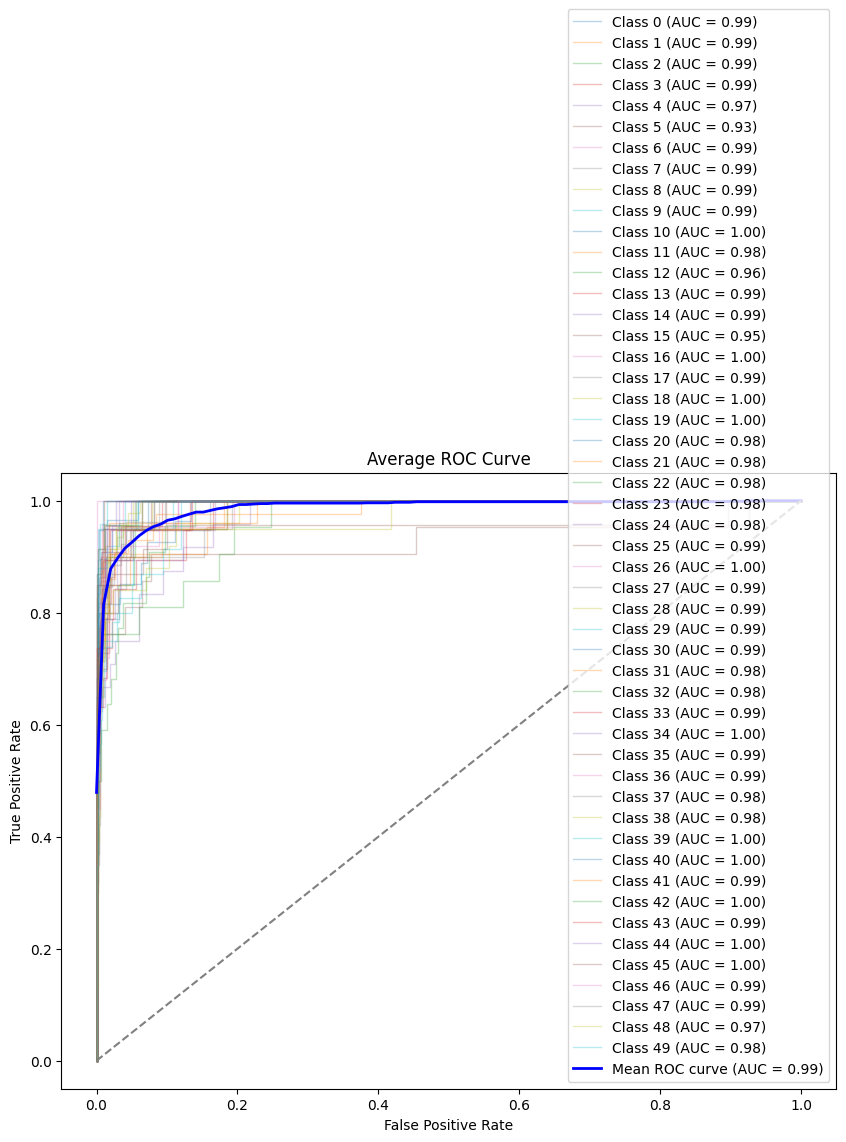

In [ ]:
n_classes = all_labels.shape[1]  # number of classes
y_true_bin = label_binarize(y_true_classes, classes=np.arange(n_classes))
y_pred_bin = y_pred  # The raw prediction probabilities

fpr_all = []
tpr_all = []
roc_auc_all = []

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    fpr_all.append(fpr)
    tpr_all.append(tpr)
    roc_auc_all.append(roc_auc)
    # Calculate the mean ROC curve
# First, interpolate the TPR at common FPR points
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(mean_fpr, fpr_all[i], tpr_all[i])

mean_tpr /= n_classes

# Calculate the AUC for the average ROC curve
mean_roc_auc = auc(mean_fpr, mean_tpr)

# Plotting the ROC curves for each class and the average curve
plt.figure(figsize=(10, 8))

# Plot the individual class ROC curves
for i in range(n_classes):
    plt.plot(fpr_all[i], tpr_all[i], lw=1, alpha=0.3, label=f'Class {i} (AUC = {roc_auc_all[i]:.2f})')

# Plot the average ROC curve
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC curve (AUC = {mean_roc_auc:.2f})', lw=2)

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customizing the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve')
plt.legend(loc='lower right')
# Show the plot
plt.show()